<h1>Patient Survival Prediction</h1>
<hr>
<h2>Project 4</h2>
<p>This project predicts the survival of pacients in a UCI.</p>
<hr>

In [8]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix)
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf


%matplotlib inline


<hr>
Open dataset
<hr>

In [5]:
df_patients = pd.read_csv('../datasets/dataset_preprocessed.csv')

In [6]:
df_patients.head(10)

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_encoded,gender_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,apache_2_bodysystem_encoded
0,0.0,68.0,22.730000,0.0,180.3,0.541667,73.9,113.0,502.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,9.0,0.0
1,0.0,77.0,27.420000,0.0,160.0,0.927778,70.2,108.0,203.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,8.0,6.0
2,0.0,25.0,31.950000,0.0,172.7,0.000694,95.3,122.0,703.03,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,5.0,3.0
3,0.0,81.0,22.640000,1.0,165.1,0.000694,61.7,203.0,1206.03,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
4,0.0,67.0,27.560000,0.0,190.5,0.000694,100.0,301.0,403.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,7.0,4.0
5,0.0,59.0,57.450000,0.0,165.1,0.000694,156.6,108.0,203.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,8.0,6.0
6,0.0,50.0,25.710000,0.0,175.3,0.060417,79.0,112.0,107.01,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0
7,0.0,72.0,28.257052,1.0,154.9,0.004861,67.8,303.0,1304.08,1.0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,8.0,6.0
8,0.0,80.0,27.382812,1.0,160.0,1.271528,70.1,218.0,1505.02,1.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0,7.0,4.0
9,0.0,81.0,38.189067,1.0,172.7,1.376389,113.9,303.0,1304.05,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,8.0,6.0


<hr>
Modelling
<hr>

In [7]:
#prepare the dataset, split into X and y datasets and then split them again into trains and test
X = df_patients.drop(['hospital_death'], axis=1)
y = df_patients['hospital_death']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=11, stratify = y)

In [24]:
#let's see how split the datasets are
print ('Split Datasets')
print ('==============')
print(f'1. X_train :{X_train.shape}')
print(f'2. y_train :{y_train.shape}')
print(f'1. X_test :{X_test.shape}')
print(f'2. y_test :{y_test.shape}')

Split Datasets
1. X_train :(61784, 103)
2. y_train :(61784,)
1. X_test :(26480, 103)
2. y_test :(26480,)


<P>Modelling the Neural Network</p>
<hr>
<p> 103 inputs, because is the size of the data set</p>
<p>due the result is binary, the output is set in 1</p>

In [15]:
# Neural network
#
nn_model = Sequential()
nn_model.add(Dense(260, input_dim=103, activation='relu'))
nn_model.add(Dense(520, activation='relu'))
nn_model.add(Dense(260, activation='relu'))
nn_model.add(Dense(130, activation='relu'))
nn_model.add(Dense(65, activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))

In [16]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs. That's why the using of <b>validation_data</b> tuple in the parameters of model.fit method

In [29]:
##Time to train!!
history = nn_model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
966/966 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.9145 - val_loss: nan - val_accuracy: 0.9145
Epoch 2/100
966/966 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.9145 - val_loss: nan - val_accuracy: 0.9145
Epoch 3/100
966/966 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.9145 - val_loss: nan - val_accuracy: 0.9145
Epoch 4/100
966/966 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.9145 - val_loss: nan - val_accuracy: 0.9145
Epoch 5/100
966/966 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.9145 - val_loss: nan - val_accuracy: 0.9145
Epoch 6/100
966/966 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.9145 - val_loss: nan - val_accuracy: 0.9145
Epoch 7/100
966/966 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.9145 - val_loss: nan - val_accuracy: 0.9145
Epoch 8/100
966/966 [====================

history variable keeps values of every iteration, I gonna use them to visualize them 

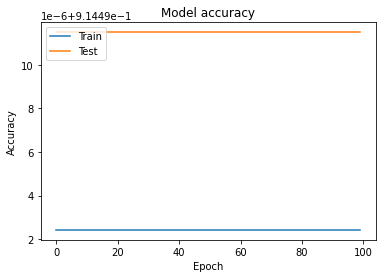

In [30]:
#plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

what the heck!!!! something goes wrong!!! 
let's go to review the features or rescale the data

In [11]:
# creating an instance for MinMaxScaler
myScaler = MinMaxScaler()
X_train_std = myScaler.fit_transform(X_train)
X_test_std = myScaler.transform(X_test)

In [12]:
#In order to make both datasets equals, let's name the colums ... yeah equal.
X_train_std = pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns= X_test.columns)

In [13]:
#let's see how split the datasets are
print ('Split Datasets')
print ('==============')
print(f'1. X_train :{X_train_std.shape}')
print(f'1. X_test :{X_test_std.shape}')


Split Datasets
1. X_train :(61784, 103)
1. X_test :(26480, 103)


In [17]:
#ok, now I can run again the model, same parameters, but a new dataset
history = nn_model.fit(X_train_std, y_train,validation_data = (X_test_std,y_test), epochs=100, batch_size=64)

Epoch 1/100


/home/hmorales/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



962/966 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.9136

/home/hmorales/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



966/966 [==============================] - 16s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9136 - val_loss: 0.0000e+00 - val_accuracy: 0.9145
Epoch 2/100
966/966 [==============================] - 13s 14ms/step - loss: 0.0000e+00 - accuracy: 0.9145 - val_loss: 0.0000e+00 - val_accuracy: 0.9145
Epoch 3/100
966/966 [==============================] - 13s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9145 - val_loss: 0.0000e+00 - val_accuracy: 0.9145
Epoch 4/100
966/966 [==============================] - 12s 12ms/step - loss: 0.0000e+00 - accuracy: 0.9145 - val_loss: 0.0000e+00 - val_accuracy: 0.9145
Epoch 5/100
966/966 [==============================] - 13s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9145 - val_loss: 0.0000e+00 - val_accuracy: 0.9145
Epoch 6/100
966/966 [==============================] - 13s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9145 - val_loss: 0.0000e+00 - val_accuracy: 0.9145
Epoch 7/100
966/966 [==============================] - 12s 12ms/step - loss: 0.0000e+00 - accu

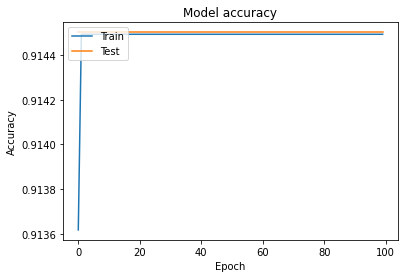

In [18]:
#I have no a good feeling about this... the values are quite similar. anyway, let's go to visualize
#plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

 That's mean the scale is not causing the mistake. let's try to change the preprocessing.

In [20]:
#predicting
y_pred = nn_model.predict(X_test)

828/828 [==============================] - 4s 4ms/step


In [21]:
y_pred_std = nn_model.predict(X_test_std)

828/828 [==============================] - 4s 5ms/step


I am going to use ROC score to evaluate de model. So firstly i need to get False Positive  Rates and True positive rates.

In [25]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_std)

ValueError: Input contains NaN.

<p>Visualization of losses and accuracies</p>

In [28]:
print(history.history)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


KeyError: 'val_accuracy'

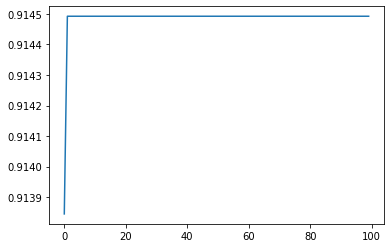

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()